# Purpose

**Author**: Freddie Vargus

This is an example notebook that shows how to generate correlation matrices using pandas and how to visualize those matrices easily using seaborn and matplotlib. We can do this both with a static universe and using the Pipeline API.

### Import the libraries

In [1]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.research import run_pipeline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Set up our static universe and get pricing

In [2]:
stocks = [
    'MSFT', 'TSLA', 'AAPL', 'NFLX', 
    'QCOM', 'QQQ', 'TWTR', 'AMZN',
    'F', 'AIG', 'LOGM', 'JCP',
]

data = get_pricing(stocks, fields='price')

### Generate our correlation matrix

In [3]:
data = data.corr()
data

,Equity(5061 [MSFT]),Equity(39840 [TSLA]),Equity(24 [AAPL]),Equity(23709 [NFLX]),Equity(6295 [QCOM]),Equity(19920 [QQQ]),Equity(45815 [TWTR]),Equity(16841 [AMZN]),Equity(2673 [F]),Equity(239 [AIG]),Equity(38560 [LOGM]),Equity(4118 [JCP])
Equity(5061 [MSFT]),1.000000,0.740524,0.499375,0.859798,0.496172,0.874734,-0.432151,0.757687,0.755282,0.864758,0.777840,-0.656982
Equity(39840 [TSLA]),0.740524,1.000000,0.515298,0.855029,0.488987,0.833750,0.802767,0.649233,0.933410,0.935244,0.894810,-0.742782
Equity(24 [AAPL]),0.499375,0.515298,1.000000,0.656439,0.831582,0.764227,0.571611,0.803717,0.481110,0.540720,0.715453,-0.684633
Equity(23709 [NFLX]),0.859798,0.855029,0.656439,1.000000,0.744893,0.962873,0.715754,0.865766,0.790306,0.929892,0.845350,-0.842987
Equity(6295 [QCOM]),0.496172,0.488987,0.831582,0.744893,1.000000,0.786674,0.407996,0.828703,0.407275,0.567919,0.597876,-0.758985
Equity(19920 [QQQ]),0.874734,0.833750,0.764227,0.962873,0.786674,1.000000,0.783853,0.929066,0.802760,0.918917,0.890445,-0.859252
Equity(45815 [TWTR]),-0.432151,0.802767,0.571611,0.715754,0.407996,0.783853,1.000000,0.697974,-0.884818,0.803079,0.064026,-0.293251
Equity(16841 [AMZN]),0.757687,0.649233,0.803717,0.865766,0.828703,0.929066,0.697974,1.000000,0.641904,0.743880,0.789231,-0.805612
Equity(2673 [F]),0.755282,0.933410,0.481110,0.790306,0.407275,0.802760,-0.884818,0.641904,1.000000,0.903212,0.912435,-0.660587
Equity(239 [AIG]),0.864758,0.935244,0.540720,0.929892,0.567919,0.918917,0.803079,0.743880,0.903212,1.000000,0.889596,-0.762946


### Plot a heatmap of our correlations

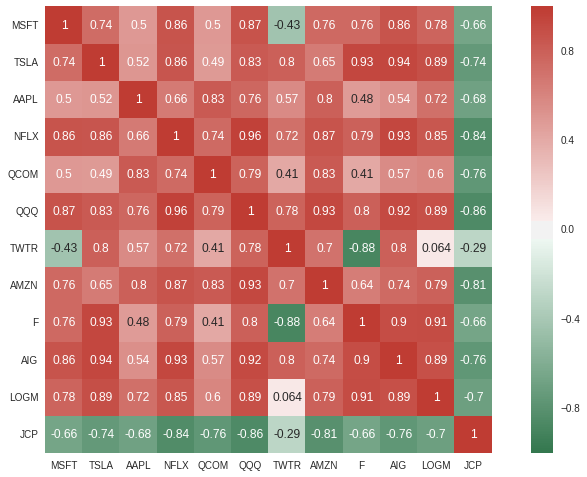

In [4]:
def make_heatmap(data, equities=False):
    heatmap = sns.heatmap(
        data, 
        mask=np.zeros_like(data, dtype=np.bool), 
        cmap=sns.diverging_palette(
            h_neg=140, 
            h_pos=374,
            l=45,
            as_cmap=True
        ),
        square=True,
        annot=True,
        xticklabels=equities,
        yticklabels=equities
    )

    heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
    plt.show()
    
make_heatmap(data, [equity.symbol for equity in data.index])

### Plot a clustermap of our correlations

/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/usr/local/lib/python2.7/dist-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


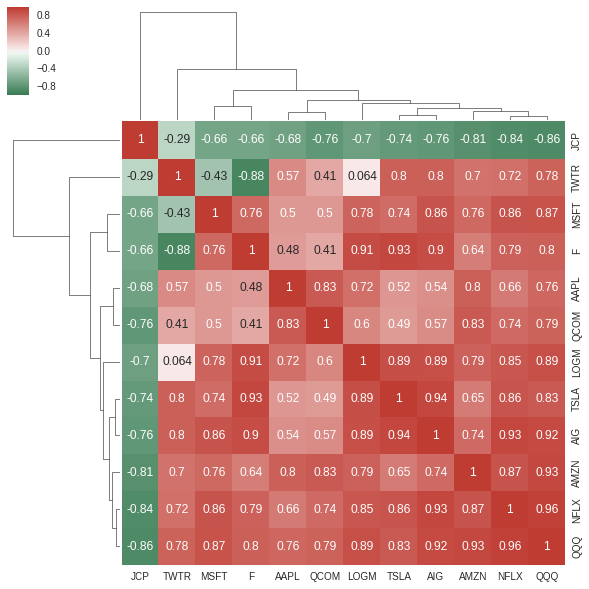

In [5]:
def make_clustermap(data, equities):
    heatmap = sns.clustermap(
        data, 
        mask=np.zeros_like(data, dtype=np.bool), 
        cmap=sns.diverging_palette(
            h_neg=140, 
            h_pos=374,
            l=45,
            as_cmap=True
        ),
        square=True,
        annot=True,
        xticklabels=equities,
        yticklabels=equities
    )

    plt.show()
    
make_clustermap(data, [equity.symbol for equity in data.index])

### Setting up a pipeline

Here will set-up a pipeline that outputs returns for companies that have a market cap of less than `$5Billion` and more than `$1Billion`

In [6]:
def make_pipeline():
    mkt_cap = morningstar.valuation.market_cap.latest
    mc_below_5_billion = ((mkt_cap < 5000000000) & (mkt_cap > 1000000000))
    
    returns = Returns(inputs=[USEquityPricing.close], window_length=42)
    return Pipeline(
        columns={
            'returns': returns
        },
        screen=mc_below_5_billion
    )

In [7]:
pipe = make_pipeline()

In [8]:
data = run_pipeline(pipe, '2013-01-01', '2014-01-01')

### Organizing data

We'll now re-organize our data so that we can pass the DataFrame into a heatmap

In [9]:
# turn the DataFrame into a single-index rather than multi-index
data = data.unstack().corr().fillna(0)
data

returns                   \
                               Equity(31 [ABAX]) Equity(39 [DDC])   
returns Equity(31 [ABAX])               1.000000         0.148160   
        Equity(39 [DDC])                0.148160         1.000000   
        Equity(52 [ABM])                0.252828        -0.169845   
        Equity(53 [ABMD])               0.000000         0.574400   
        Equity(66 [AB])                -0.054338         0.484513   
        Equity(88 [ACI])               -0.313003        -0.204498   
        Equity(99 [ACO])                0.267847        -0.295913   
        Equity(100 [IEP])               0.000000         0.000000   
        Equity(110 [ACXM])              0.311730         0.353425   
        Equity(154 [AEM])               0.329592         0.157088   
        Equity(197 [AGCO])             -0.031721         0.242003   
        Equity(247 [AIN])               0.444823        -0.092418   
        Equity(253 [AIR])               0.000000         0.181865   
        Equity(266 [AJG])               0.000000        -0.263542   
        Equity(270 [AKRX])             -0.206230         0.028181   
        Equity(273 [ALU])              -0.027963        -0.673206   
        Equity(289 [MATX])              0.029041        -0.566204   
        Equity(300 [ALK])              -0.067565         0.762113   
        Equity(301 [ALKS])             -0.393357         0.077106   
        Equity(311 [ALOG])              0.000000        -0.167213   
        Equity(332 [ALX])               0.281924         0.622521   
        Equity(351 [AMD])               0.098141        -0.287355   
        Equity(410 [AN])                0.000000         0.000000   
        Equity(412 [ANAT])             -0.285514         0.294388   
        Equity(430 [ANN])              -0.132951        -0.583015   
        Equity(474 [APOG])              0.000000         0.194033   
        Equity(484 [ATU])               0.299146        -0.619120   
        Equity(508 [AIRM])              0.368290         0.322757   
        Equity(523 [AAN])              -0.214141         0.380010   
        Equity(538 [ARW])               0.042142        -0.276711   
...                                          ...              ...   
        Equity(45506 [PINC])            0.000000        -0.516451   
        Equity(45521 [RNG])             0.000000         0.667924   
        Equity(45526 [PEGI])            0.000000        -0.632818   
        Equity(45558 [BURL])            0.000000        -0.449380   
        Equity(45559 [ESRT])            0.000000        -0.076875   
        Equity(45562 [ESBA])            0.000000        -0.807256   
        Equity(45563 [OGCP])            0.000000        -0.838704   
        Equity(45564 [FISK])            0.000000        -0.690478   
        Equity(45577 [OCIP])            0.000000         0.889836   
        Equity(45640 [WNRL])            0.000000        -0.711249   
        Equity(45641 [CXP])             0.000000        -0.643737   
        Equity(45656 [GLPI])            0.000000         0.778383   
        Equity(45670 [OMF])             0.000000         0.337701   
        Equity(45676 [ABGB])            0.000000         0.346640   
        Equity(45734 [COMM])            0.000000         0.780365   
        Equity(45735 [EIGI])            0.000000         0.896705   
        Equity(45755 [BRX])             0.000000        -1.000000   
        Equity(45756 [CRTO])            0.000000        -1.000000   
        Equity(45757 [SCAI])            0.000000         1.000000   
        Equity(45769 [WUBA])            0.000000         0.000000   
        Equity(45770 [ESNT])            0.000000         0.000000   
        Equity(45780 [TCS])             0.000000         0.000000   
        Equity(45781 [QUNR])            0.000000         0.000000   
        Equity(45797 [CUDA])            0.000000         0.000000   
        Equity(45839 [CXP_WD])          0.000000         0.000000   
        Equity(45861 [HMHC])           

In [10]:
data = data.reset_index(level=0, drop=True)

In [11]:
# drop all columns with all zeroes
data = data.loc[:, (data != 0).any(axis=0)]
# drop all rows with all zeroes
data = data[(data.T != 0).any()]
data.head()

returns                                    \
                  Equity(31 [ABAX]) Equity(39 [DDC]) Equity(52 [ABM])   
Equity(31 [ABAX])          1.000000         0.148160         0.252828   
Equity(39 [DDC])           0.148160         1.000000        -0.169845   
Equity(52 [ABM])           0.252828        -0.169845         1.000000   
Equity(53 [ABMD])          0.000000         0.574400         0.259178   
Equity(66 [AB])           -0.054338         0.484513         0.242874   

                                                                      \
                  Equity(53 [ABMD]) Equity(66 [AB]) Equity(88 [ACI])   
Equity(31 [ABAX])          0.000000       -0.054338        -0.313003   
Equity(39 [DDC])           0.574400        0.484513        -0.204498   
Equity(52 [ABM])           0.259178        0.242874         0.184913   
Equity(53 [ABMD])          1.000000        0.888400         0.000000   
Equity(66 [AB])            0.888400        1.000000         0.023448   

                                                                         \
                  Equity(99 [ACO]) Equity(100 [IEP]) Equity(110 [ACXM])   
Equity(31 [ABAX])         0.267847          0.000000           0.311730   
Equity(39 [DDC])         -0.295913          0.000000           0.353425   
Equity(52 [ABM])          0.576725          0.876677           0.201154   
Equity(53 [ABMD])        -0.693857          0.000000           0.288627   
Equity(66 [AB])          -0.438608          0.441464          -0.336705   

                                            ...                                \
                  Equity(154 [AEM])         ...          Equity(45640 [WNRL])   
Equity(31 [ABAX])          0.329592         ...                      0.000000   
Equity(39 [DDC])           0.157088         ...                     -0.711249   
Equity(52 [ABM])          -0.190782         ...                     -0.220394   
Equity(53 [ABMD])          0.540510         ...                     -0.376588   
Equity(66 [AB])            0.041147         ...                     -0.677806   

                                                            \
                  Equity(45641 [CXP]) Equity(45656 [GLPI])   
Equity(31 [ABAX])            0.000000             0.000000   
Equity(39 [DDC])            -0.643737             0.778383   
Equity(52 [ABM])            -0.088775             0.291534   
Equity(53 [ABMD])           -0.626379             0.273474   
Equity(66 [AB])             -0.803227             0.805880   

                                                            \
                  Equity(45670 [OMF]) Equity(45676 [ABGB])   
Equity(31 [ABAX])            0.000000             0.000000   
Equity(39 [DDC])             0.337701             0.346640   
Equity(52 [ABM])             0.508315             0.567725   
Equity(53 [ABMD])           -0.572999            -0.606835   
Equity(66 [AB])             -0.583539            -0.544987   

                                                             \
                  Equity(45734 [COMM]) Equity(45735 [EIGI])   
Equity(31 [ABAX])             0.000000             0.000000   
Equity(39 [DDC])              0.780365             0.896705   
Equity(52 [ABM])              0.073013             0.352403   
Equity(53 [ABMD])            -0.909746            -0.556080   
Equity(66 [AB])              -0.797793            -0.308979   

                                                            \
                  Equity(45755 [BRX]) Equity(45756 [CRTO])   
Equity(31 [ABAX])                 0.0                  0.0   
Equity(39 [DDC])                 -1.0                 -1.0   
Equity(52 [ABM])                  1.0                  1.0   
Equity(53 [ABMD])                 1.0                  1.0   
Equity(66 [AB])                   1.0                  1.0   

                                        
                  Equity(45757 [SCAI])  
Equity(31 [ABAX])                  0.0  
Equity(39 [DDC])                   1.0  
Equity

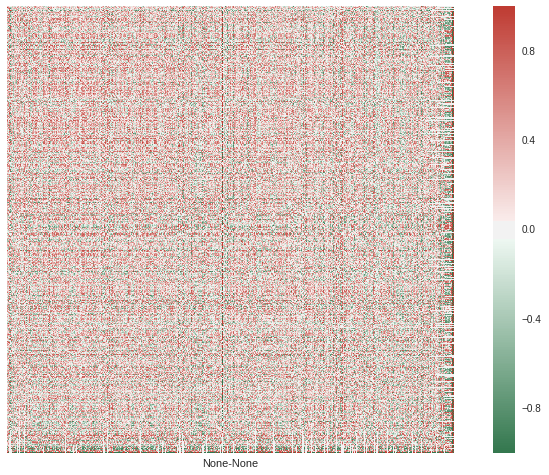

In [12]:
make_heatmap(data)

### Zooming in

There's a lot of data here and we can't really see where there are clusters of data so we'll just zoom in on a small subset of the data

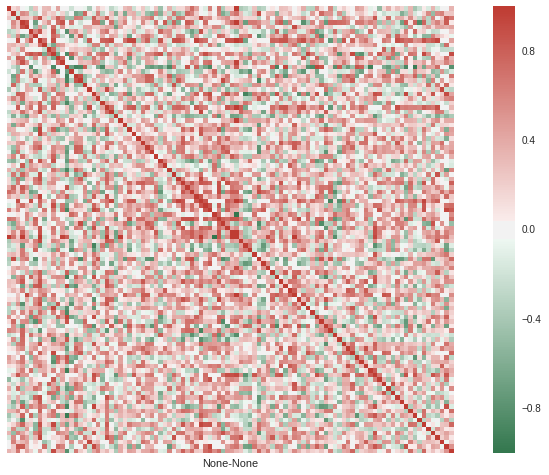

In [13]:
make_heatmap(data.iloc[:100, :100])

### Ways to extend this

- Compute covariance matrices rather than correlation matrices; correlation matrices are just the standardized version of a covariance matrix
- Create clusters of securities using [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering). [SciPy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) has a submodule for this
- Read about  [hierarchical risk parity](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2708678). The presentation for the paper, by Marcos Lopez de Prado, can be found [here](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2713516)